# During the lockdown I published my first book titled Inspiration:Thoughts on Spirituality,Technology,Wealth,Leadership and Motivation.The preview of the book can be read from the Amazon link https://lnkd.in/gj7bMQA .
# E Book is availabe for Rs 99 in India.Paperback Edition of the book is available on Amazon.com link https://lnkd.in/gkFYYMJ

I have been working in automobile industry for last 12 years.So any data on automotive industry is interesting for me.Automotive industry has been going through disruptions like electric cars,car sharing and autonomous vehicles.In this project I will be exploring the data set and predicting the price of the car.This project is work in process and I will be updating the project in coming days.Please go through below blog link to read my views on future of Automotive industry. Electric cars http://btplife.blogspot.com/2017/05/electric-car-disruption.html

In this Notebook we will be covering following topics

1.Data Preprocessing 

2.2.Exploratory Data Analysis 


In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['tesla-mode3', 'automobile-dataset']


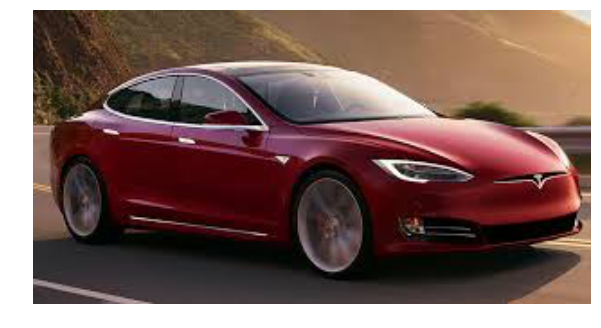

In [2]:
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib inline
import numpy as np
img=np.array(Image.open('../input/tesla-mode3/Tesla.jpg'))
fig=plt.figure(figsize=(10,10))
plt.imshow(img,interpolation='bilinear')
plt.axis('off')
plt.show()

Picture shows the Tesla model 3 which is the highest selling  Electric car in the world

# 1.Data Preprocessing 

### Importing Python Modules

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
#plt.style.use('seaborn')
import seaborn as sns
plt.style.use('fivethirtyeight')

### Importing data 

In [4]:
car=pd.read_csv('../input/automobile-dataset/Automobile_data.csv')
car.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


**Summary of DataSet**

In [5]:
print('Rows     :',car.shape[0])
print('Columns  :',car.shape[1])
print('\nFeatures :\n     :',car.columns.tolist())
print('\nMissing values    :',car.isnull().values.sum())
print('\nUnique values :  \n',car.nunique())

Rows     : 205
Columns  : 26

Features :
     : ['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration', 'num-of-doors', 'body-style', 'drive-wheels', 'engine-location', 'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type', 'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke', 'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg', 'highway-mpg', 'price']

Missing values    : 0

Unique values :  
 symboling              6
normalized-losses     52
make                  22
fuel-type              2
aspiration             2
num-of-doors           3
body-style             5
drive-wheels           3
engine-location        2
wheel-base            53
length                75
width                 44
height                49
curb-weight          171
engine-type            7
num-of-cylinders       7
engine-size           44
fuel-system            8
bore                  39
stroke                37
compression-ratio     32
horsepower            60


In [6]:
car.shape

(205, 26)

There are 25 features in the data.We have to figure out which parameter will have highest impact on the price of the car.

### Missing Values

,Total,Percent
price,0,0.0
highway-mpg,0,0.0
normalized-losses,0,0.0
make,0,0.0
fuel-type,0,0.0


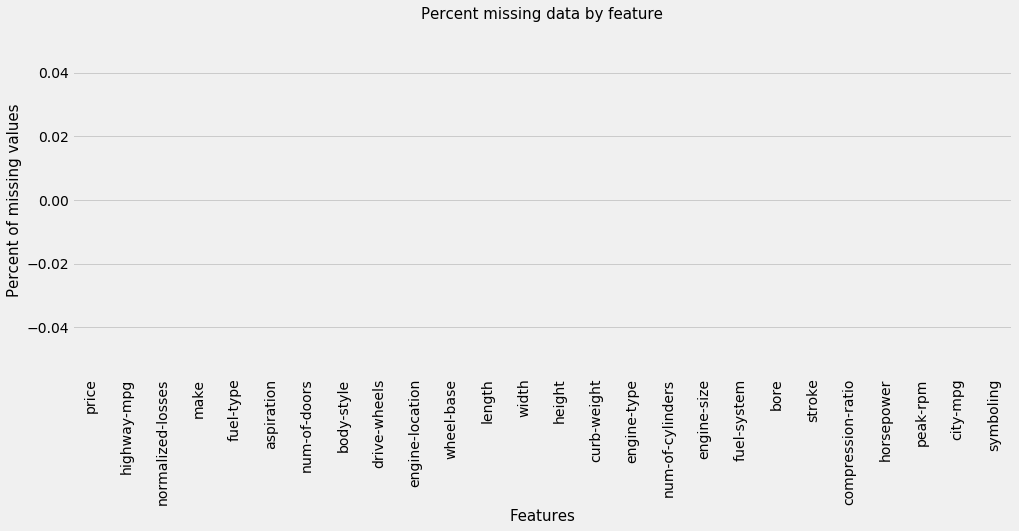

In [7]:
total = car.isnull().sum().sort_values(ascending=False)
percent = (car.isnull().sum()/car.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
f, ax = plt.subplots(figsize=(15, 6))
plt.xticks(rotation='90')
sns.barplot(x=missing_data.index, y=missing_data['Percent'])
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)
missing_data.head()

In [8]:
#car.info

Using the info command we can see that in many place data is represent by symbol **?**.We have to replace **?** with the mean value of the columns.We have to first prepare the data by doing cleaning on the data set.

### Handling missing data

In [9]:
a=car[car['normalized-losses']!='?']
b=(a['normalized-losses'].astype(int)).mean()
car['normalized-losses']=car['normalized-losses'].replace('?',b).astype(int)

We can see than in some places the value for num-of-doors data is marked as **?**.We fill this with appropriate value of num of doors.

### Cleaning num-of-doors

In [10]:
a=car[car['body-style']=='sedan']
a['num-of-doors'].value_counts()

four    79
two     15
?        2
Name: num-of-doors, dtype: int64

In case of sedan cars the value of num-of-doors is missing in two places.We can see in most sedan cars the number of doors is 4.We can replace the missing values of num-of-doors with value 4

In [11]:
a=car['num-of-doors'].map({'two':2,'four':4,'?':4})
car['num-of-doors']=a

### Cleaning price

In [12]:
a=car[car['price']!='?']
b=(a['price'].astype(int)).mean()
car['price']=car['price'].replace('?',b).astype(int)

### Cleaning horse power 

In [13]:
a=car[car['horsepower']!='?']
b=(a['horsepower'].astype(int)).mean()
car['horsepower']=car['horsepower'].replace('?',b).astype(int)

### Cleaning bore

In [14]:
a=car[car['bore']!='?']
b=(a['bore'].astype(float)).mean()
car['bore']=car['bore'].replace('?',b).astype(float)

### Cleaning the stroke column

In [15]:
a=car[car['stroke']!='?']
b=(a['stroke'].astype(float)).mean()
car['stroke']=car['stroke'].replace('?',b).astype(float)

### Cleaning peak rpm

In [16]:
a=car[car['peak-rpm']!='?']
b=(a['peak-rpm'].astype(float)).mean()
car['peak-rpm']=car['peak-rpm'].replace('?',b).astype(float)

### Cleaning the number of cylinders

In [17]:
a=car['num-of-cylinders'].map({'four':4,'five':5,'six':6,'?':4})
car['num-of-doors']=a

### Getting the basic stats of the data

In [18]:
car.describe().T

,count,mean,std,min,25%,50%,75%,max
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
normalized-losses,205.0,122.000000,31.681008,65.00,101.00,122.00,137.00,256.00
num-of-doors,194.0,4.304124,0.679289,4.00,4.00,4.00,4.00,6.00
wheel-base,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
length,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
width,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
height,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curb-weight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
engine-size,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
bore,205.0,3.329751,0.270844,2.54,3.15,3.31,3.58,3.94


Some important Observations Mean Horse Power 104

Highway mileage is 30.75

Price is 13207.12 Dollars 

# 2.Exploratory Data Analysis 

**Make**

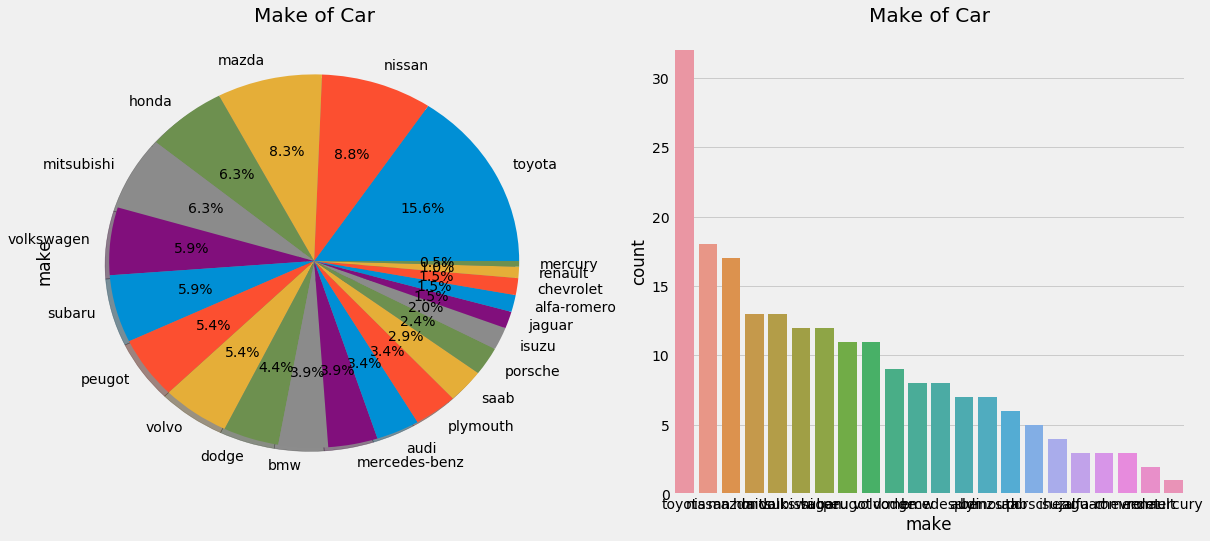

In [19]:
f,ax=plt.subplots(1,2,figsize=(18,8))
car['make'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Make of Car')
#ax[0].set_ylabel('Count')
sns.countplot('make',data=car,ax=ax[1],order=car['make'].value_counts().index)
ax[1].set_title('Make of Car')
#ax[1].set_xticklabels(rotation=30)
plt.show()

We have more Japanese Cars in the Dataset followed by European

**Fuel Type**

In [20]:
car.columns

Index(['symboling', 'normalized-losses', 'make', 'fuel-type', 'aspiration',
       'num-of-doors', 'body-style', 'drive-wheels', 'engine-location',
       'wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-type',
       'num-of-cylinders', 'engine-size', 'fuel-system', 'bore', 'stroke',
       'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
       'highway-mpg', 'price'],
      dtype='object')

In [21]:
pd.crosstab(car.make,car['fuel-type'],margins=True).T.style.background_gradient(cmap='summer_r')

make,alfa-romero,audi,bmw,chevrolet,dodge,honda,isuzu,jaguar,mazda,mercedes-benz,mercury,mitsubishi,nissan,peugot,plymouth,porsche,renault,saab,subaru,toyota,volkswagen,volvo,All
fuel-type,,,,,,,,,,,,,,,,,,,,,,,
diesel,0,0,0,0,0,0,0,0,2,4,0,0,1,5,0,0,0,0,0,3,4,1,20
gas,3,7,8,3,9,13,4,3,15,4,1,13,17,6,7,5,2,6,12,29,8,10,185
All,3,7,8,3,9,13,4,3,17,8,1,13,18,11,7,5,2,6,12,32,12,11,205


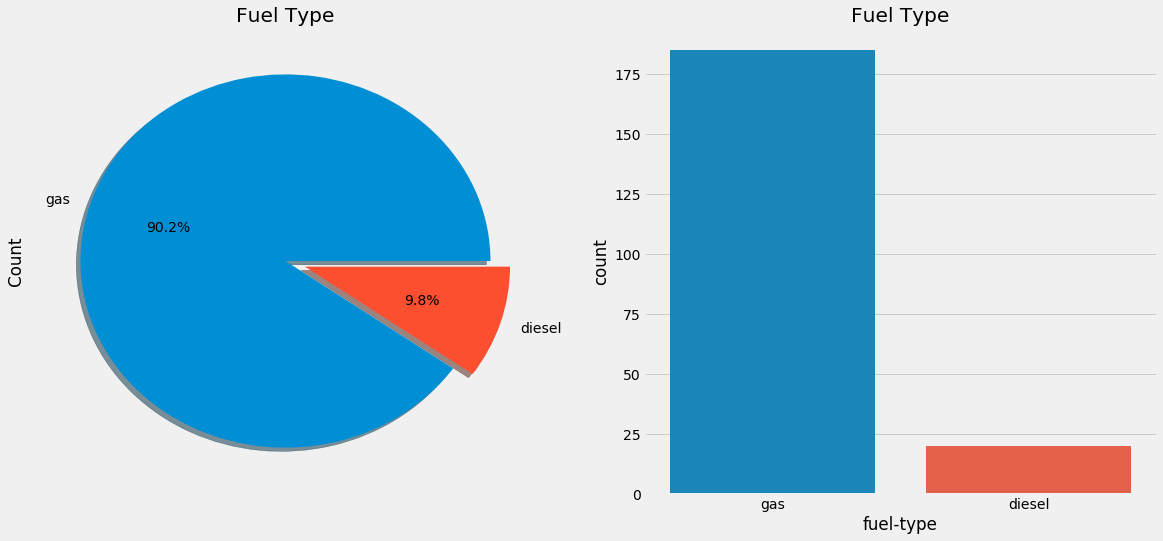

In [22]:
f,ax=plt.subplots(1,2,figsize=(18,8))
car['fuel-type'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Fuel Type')
ax[0].set_ylabel('Count')
sns.countplot('fuel-type',data=car,ax=ax[1],order=car['fuel-type'].value_counts().index)
ax[1].set_title('Fuel Type')
plt.show()

We can see that 90% of the cars in the Data Set are Petrol.US is a Gasoline market unlike Europe and India which have more Share of Diesel Cars

### Aspiration type

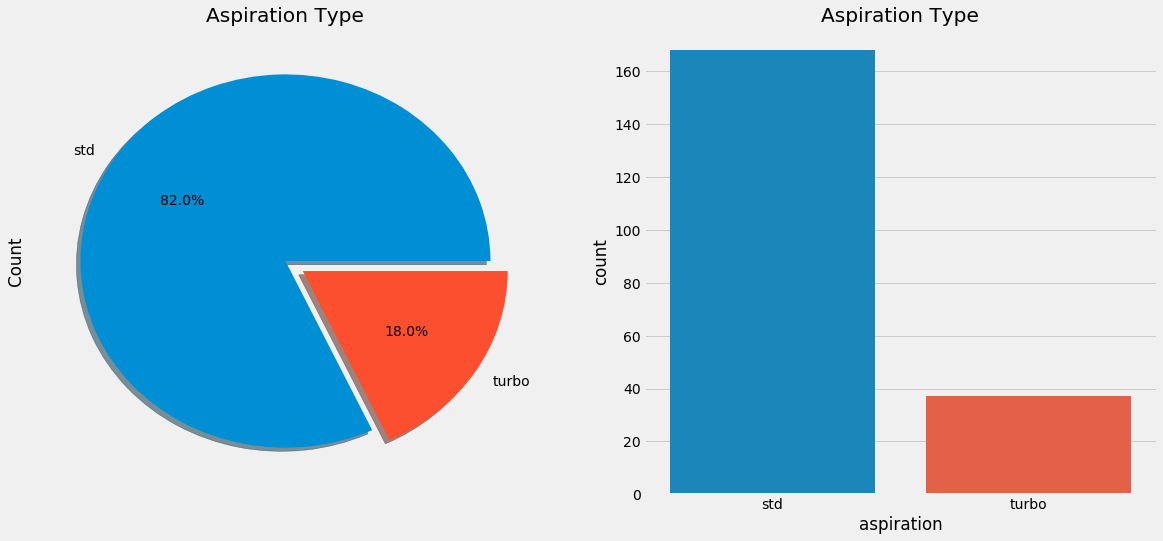

In [23]:
f,ax=plt.subplots(1,2,figsize=(18,8))
car['aspiration'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Aspiration Type')
ax[0].set_ylabel('Count')
sns.countplot('aspiration',data=car,ax=ax[1],order=car['aspiration'].value_counts().index)
ax[1].set_title('Aspiration Type')
plt.show()

Most vehicle have standard Aspiration.The reason is this data set is very old.Now a days most vehicles have turbo system which improves efficiency and power output from an engine.

### Cars of different make in the data set

In [24]:
print('Car makers in the data set are',car['make'].unique())

Car makers in the data set are ['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo']


### Understanding the range of important features

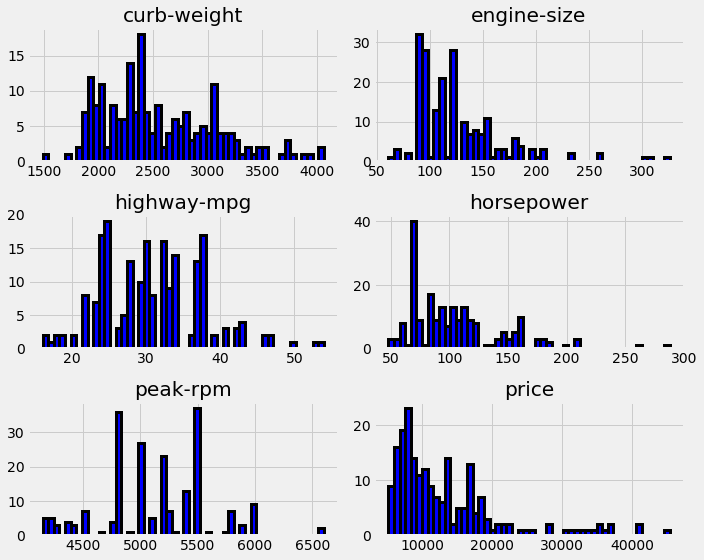

In [25]:
car[['engine-size','peak-rpm','curb-weight','horsepower','price','highway-mpg']].hist(figsize=(10,8),bins=50,color='b',linewidth='3',edgecolor='k')
plt.tight_layout()
plt.show()

**1.Curb weight:** Is the total weight of the vehicle without the weight of the passenger.It includes weight of coolants,oil and fuel.Defination of curb weight may vary based on the standard adopted by a country.In this data set the curb weight of most cars is in the range 2000-3100 lbs.

**2.Engine Size:** It is the amount of air that can be sucked in by the engine.Generally it is measured in litres.For example an average car in India would have an engine capacity in the rane of 1-1.5 liter.

**3.Highway-mpg:** It is the kilometer or miles that a  car can travel with one liter of fuel on the highway.In this data set it seems to me that it is the amount of miles the car travels with one gallon of fuel.

**4.Horse Power:** It is the measure of the power of the engine.One horse power is equivalent of the power of one horse.So 100 hp engine woulf be equivalent to the power of 100 horses.Now a days engine power is measure in Kilowatt which is the unit of power in SI System.

**5.Peak rpm:** RPM (Reolutions per minute) is the measure of the speed of roation of Engine per minute.The peak rpm of the vehicles are generally in the range 5000-6500 rpm.

**6.Price:** In US today the median price of the vehicle is around 35000$.This is a old data so it shows very low median car price.

### Which Make of Car is More?

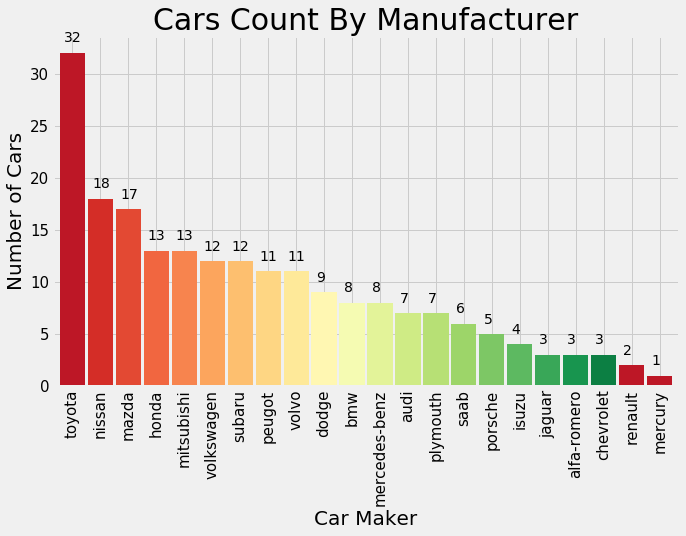

In [26]:
plt.subplots(figsize=(10,6))
ax=car['make'].value_counts().plot.bar(width=0.9,color=sns.color_palette('RdYlGn',20))
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+1))
plt.xticks(rotation='vertical')
plt.xlabel('Car Maker',fontsize=20)
plt.ylabel('Number of Cars',fontsize=20)
plt.title('Cars Count By Manufacturer',fontsize=30)
ax.tick_params(labelsize=15)
#plt.yticks(rotation='vertical')
plt.show()
plt.show()

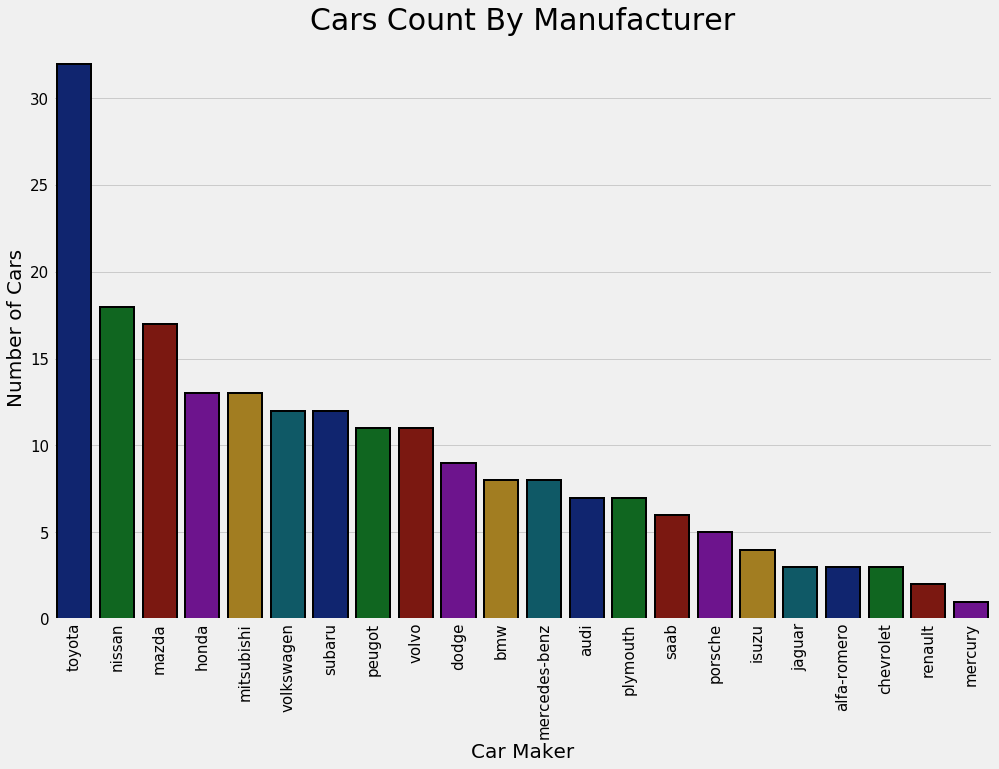

In [27]:
fig = plt.figure(figsize=(15, 10))
ax=sns.countplot(car['make'],palette='dark',edgecolor='k',linewidth=2,order = car['make'].value_counts().index)
plt.xticks(rotation='vertical')
plt.xlabel('Car Maker',fontsize=20)
plt.ylabel('Number of Cars',fontsize=20)
plt.title('Cars Count By Manufacturer',fontsize=30)
ax.tick_params(labelsize=15)
#plt.yticks(rotation='vertical')
plt.show()

It seems more Japanese cars are sold in the US.As expected Toyota sold more cars in US.In the 70's due to oil price rise Americans switched to small cars.Japanese car makers were good at making high quality small cars.This is the reason we have more cars been sold from Toyota,Mazda and Nissan.

In [28]:
print('Different types of cars',car['body-style'].unique())

Different types of cars ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']


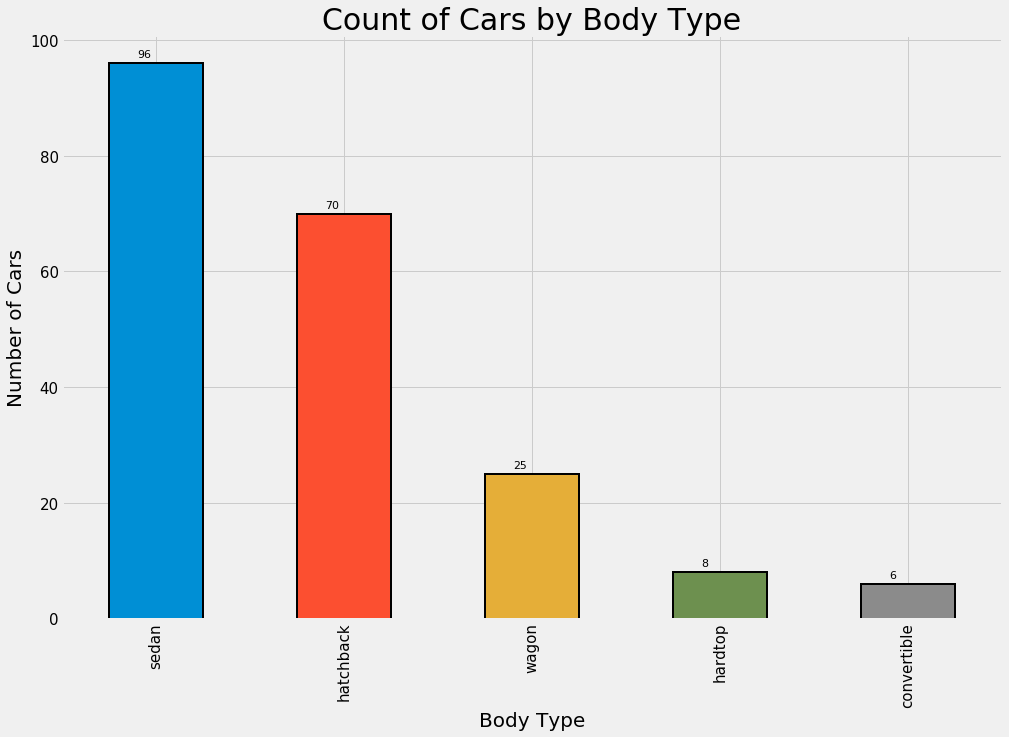

In [29]:
fig = plt.figure(figsize=(15, 10))
cars_type=car.groupby(['body-style']).count()['make']
ax=cars_type.sort_values(ascending=False).plot.bar(edgecolor='k',linewidth=2)
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x()+0.15, p.get_height()+1),fontsize=11)
plt.xticks(rotation='vertical')
plt.xlabel('Body Type',fontsize=20)
plt.ylabel('Number of Cars',fontsize=20)
plt.title('Count of Cars by Body Type',fontsize=30)
ax.tick_params(labelsize=15)
#plt.yticks(rotation='vertical')
plt.show()

<Figure size 1800x1800 with 0 Axes>

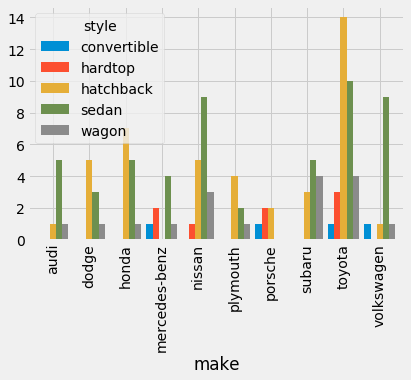

In [30]:
from matplotlib.pyplot import plot
fig = plt.figure(figsize=(25, 25))
a=car.groupby(['body-style','make']).count().reset_index();
a=a[['make','body-style','symboling']]
a.columns=['make','style','count']
a=a.pivot('make','style','count')
a.dropna(thresh=3).plot.bar(width=0.85);
#plot.bar()
plt.ioff()
plt.show()

### Getting details of Engine type,Number of doors,type of fuel and body style

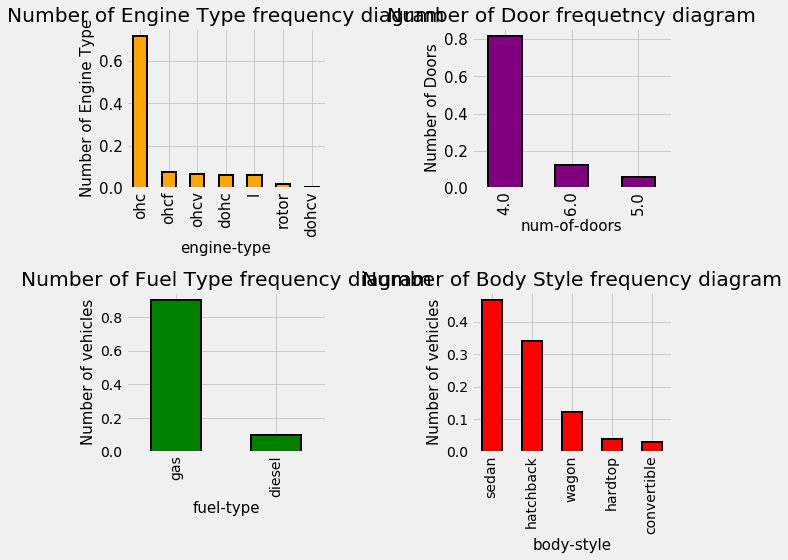

In [31]:
plt.figure(1)
plt.subplot(221)
ax1=car['engine-type'].value_counts(normalize=True).plot(figsize=(10,8),kind='bar',color='orange',edgecolor='k',linewidth=2)
plt.title("Number of Engine Type frequency diagram")
plt.ylabel('Number of Engine Type',fontsize=15)
ax1.tick_params(labelsize=15)
plt.xlabel('engine-type',fontsize=15);


plt.subplot(222)
ax2=car['num-of-doors'].value_counts(normalize=True).plot(figsize=(10,8),kind='bar',color='purple',edgecolor='k',linewidth=2)
plt.title("Number of Door frequetncy diagram")
plt.ylabel('Number of Doors',fontsize=15)
ax2.tick_params(labelsize=15)
plt.xlabel('num-of-doors',fontsize=15);

plt.subplot(223)
ax3=car['fuel-type'].value_counts(normalize= True).plot(figsize=(10,8),kind='bar',color='green',edgecolor='k',linewidth=2)
plt.title("Number of Fuel Type frequency diagram")
plt.ylabel('Number of vehicles',fontsize=15)
plt.xlabel('fuel-type',fontsize=15)
ax2.tick_params(labelsize=15)

plt.subplot(224)
ax4=car['body-style'].value_counts(normalize=True).plot(figsize=(10,8),kind='bar',color='red',edgecolor='k',linewidth=2)
plt.title("Number of Body Style frequency diagram")
plt.ylabel('Number of vehicles',fontsize=15)
plt.xlabel('body-style',fontsize=15);
plt.tight_layout()
plt.show()


1.DHC (Direct overhead cam) tyoe of engines are more in the data.

2.Most cars sold have 4 doors 

3.Petrol(Gas) cars are more popular in America

4.Sedan Cars are most popular in America

### Plotting the fuel economy of different car makers

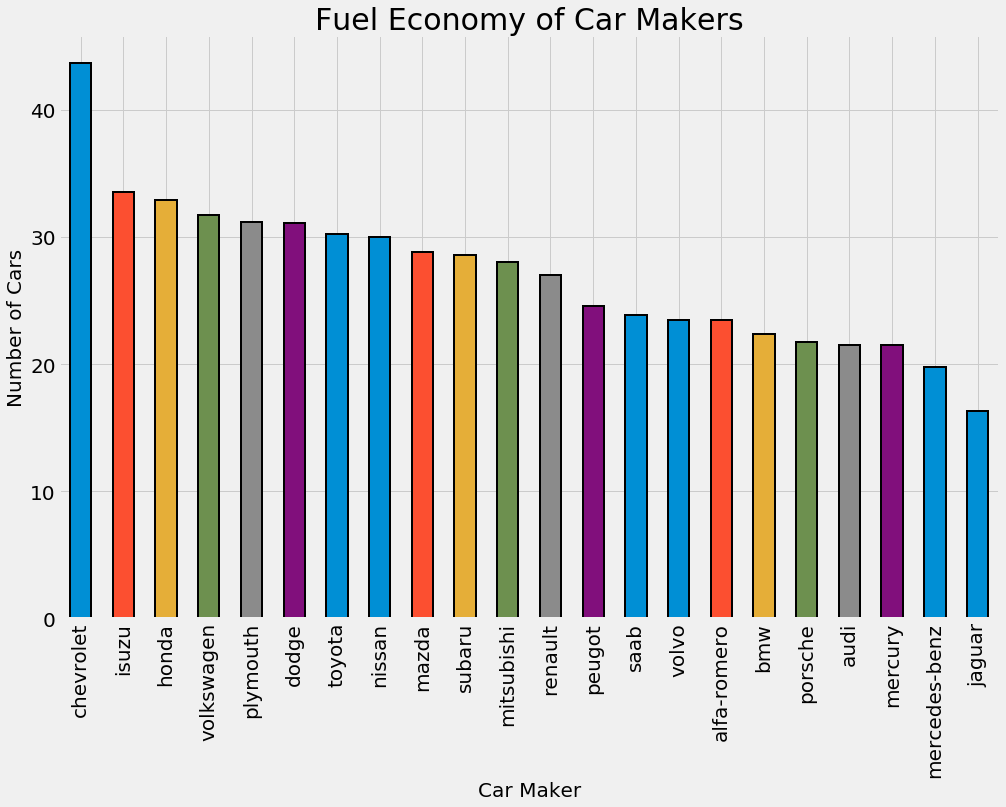

In [32]:
fig = plt.figure(figsize=(15, 10))
mileage=car.groupby(['make']).mean()
mileage['avg-mpg']=((mileage['city-mpg']+mileage['highway-mpg'])/2)
ax=mileage['avg-mpg'].sort_values(ascending=False).plot.bar(edgecolor='k',linewidth=2)
plt.xticks(rotation='vertical')
plt.xlabel('Car Maker',fontsize=20)
plt.ylabel('Number of Cars',fontsize=20)
plt.title('Fuel Economy of Car Makers',fontsize=30)
ax.tick_params(labelsize=20)
#plt.yticks(rotation='vertical')
plt.show()
plt.show()

Chevy which is a brand of General motors had the highest milage followed by the Japanese car makers.European car makers except Volkswagen sell Luxary cars.So the Mileage of European car makers are lower.Cars with lower engine capacity generally have higher fuel economy.

### Find out the relation between the horse power and the number of cylinders 

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


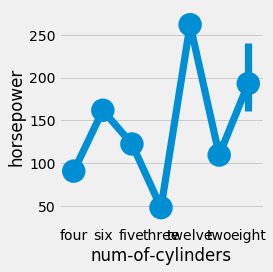

In [33]:
plt.rcParams['figure.figsize']=(23,10)
ax=sns.factorplot(data=car, x="num-of-cylinders", y="horsepower");
#ax.set_xlabel('Number of Cyliner',fontsize=30)
#ax.set_ylabel('Horse Power',fontsize=30)
#plt.title('Horse Power Vs Num of Cylinder',fontsize=40)
#ax.tick_params(axis='x',labelsize=20,rotation=90)
plt.ioff()

We can see that the range of power output from eight cylinder engine is very high.It seems more the engines with higher number of cylinders can give a bigger range of power output

### Getting the Price of car based on make

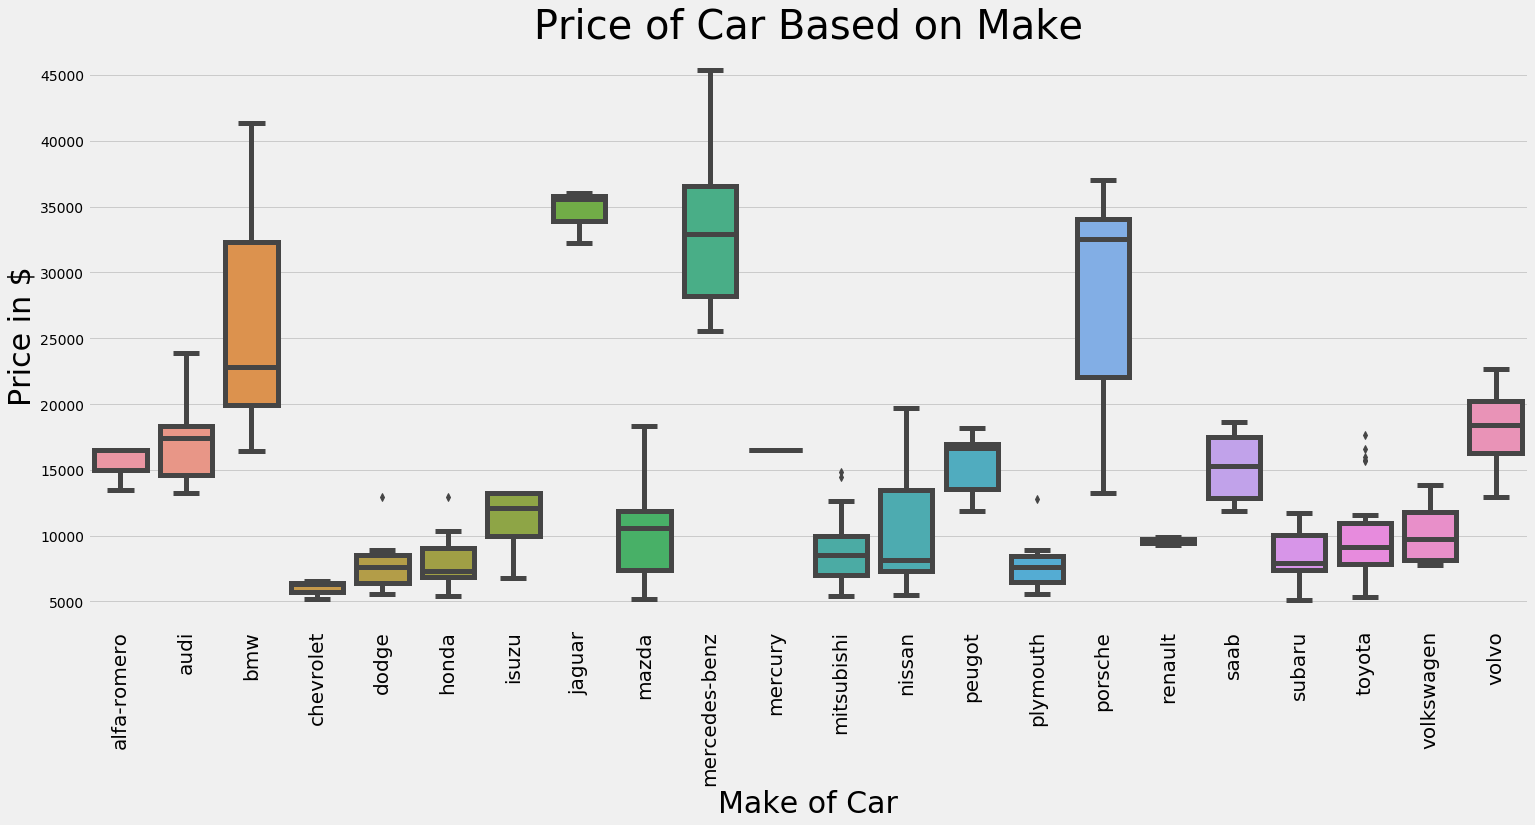

In [34]:
plt.rcParams['figure.figsize']=(23,10)
ax = sns.boxplot(x="make", y="price", data=car,width=0.8,linewidth=5)
ax.set_xlabel('Make of Car',fontsize=30)
ax.set_ylabel('Price in $',fontsize=30)
plt.title('Price of Car Based on Make',fontsize=40)
ax.tick_params(axis='x',labelsize=20,rotation=90)

We can see that Mercedes Benz , BMW and Prosche sell the expensive cars in America.

From the heat map we can make out that Width,Curb weight,Engine weight,Horse power,Highway-mpg have very high correlation to the price of the car.

/opt/conda/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


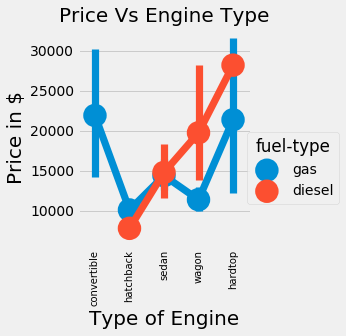

In [35]:
sns.factorplot(data=car, y="price", x="body-style" , hue="fuel-type" ,kind="point")
plt.xlabel('Type of Engine',fontsize=20)
plt.ylabel('Price in $',fontsize=20)
plt.title('Price Vs Engine Type',fontsize=20)
plt.tick_params(axis='x',labelsize=10,rotation=90)

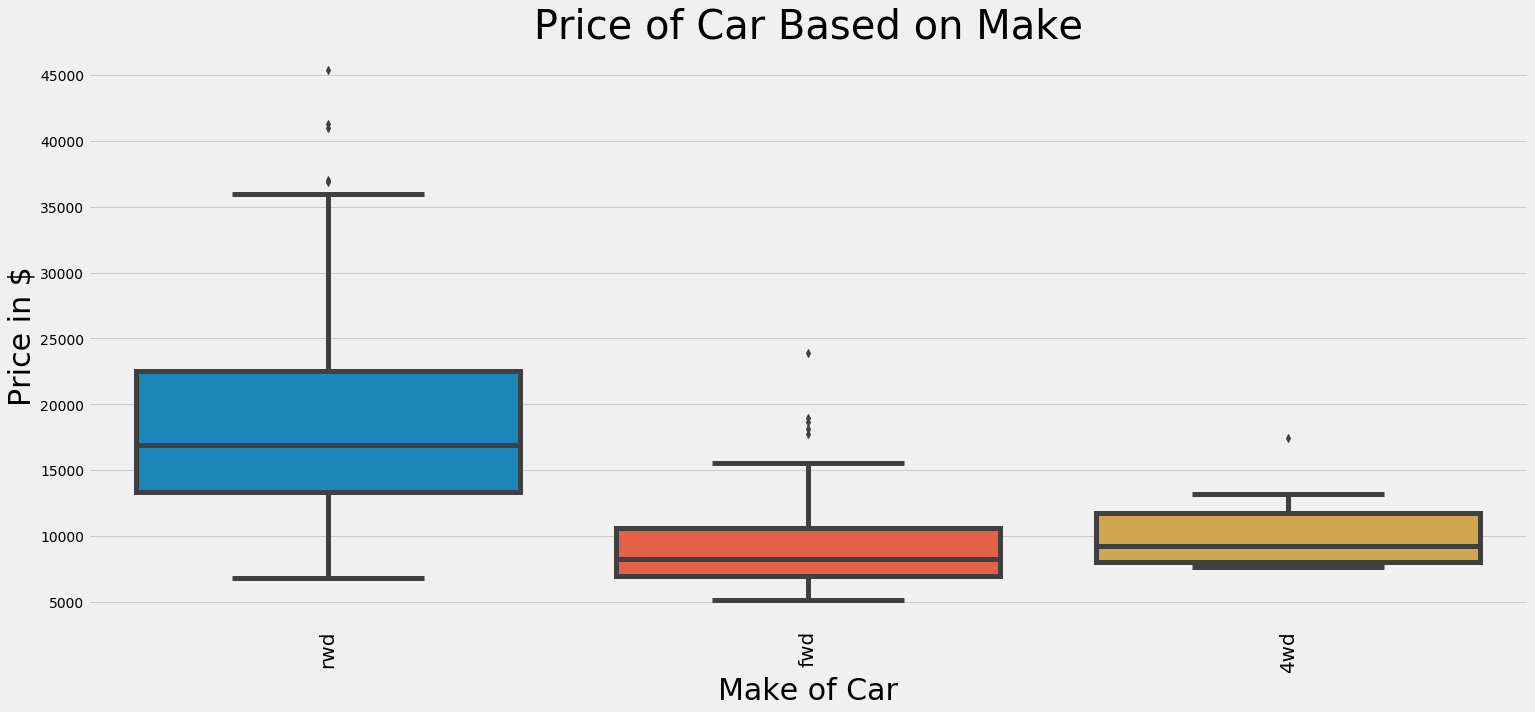

In [36]:
plt.rcParams['figure.figsize']=(23,10)
ax=sns.boxplot(x='drive-wheels',y='price',data=car,width=0.8,linewidth=5)
ax.set_xlabel('Make of Car',fontsize=30)
ax.set_ylabel('Price in $',fontsize=30)
plt.title('Price of Car Based on Make',fontsize=40)
ax.tick_params(axis='x',labelsize=20,rotation=90)

Rear wheel drive are more expensive with a median price of $17000.Generally four wheel drive are more expensive.This is bit surprising.

### Plotting heat map to understand correlations between diffeent features

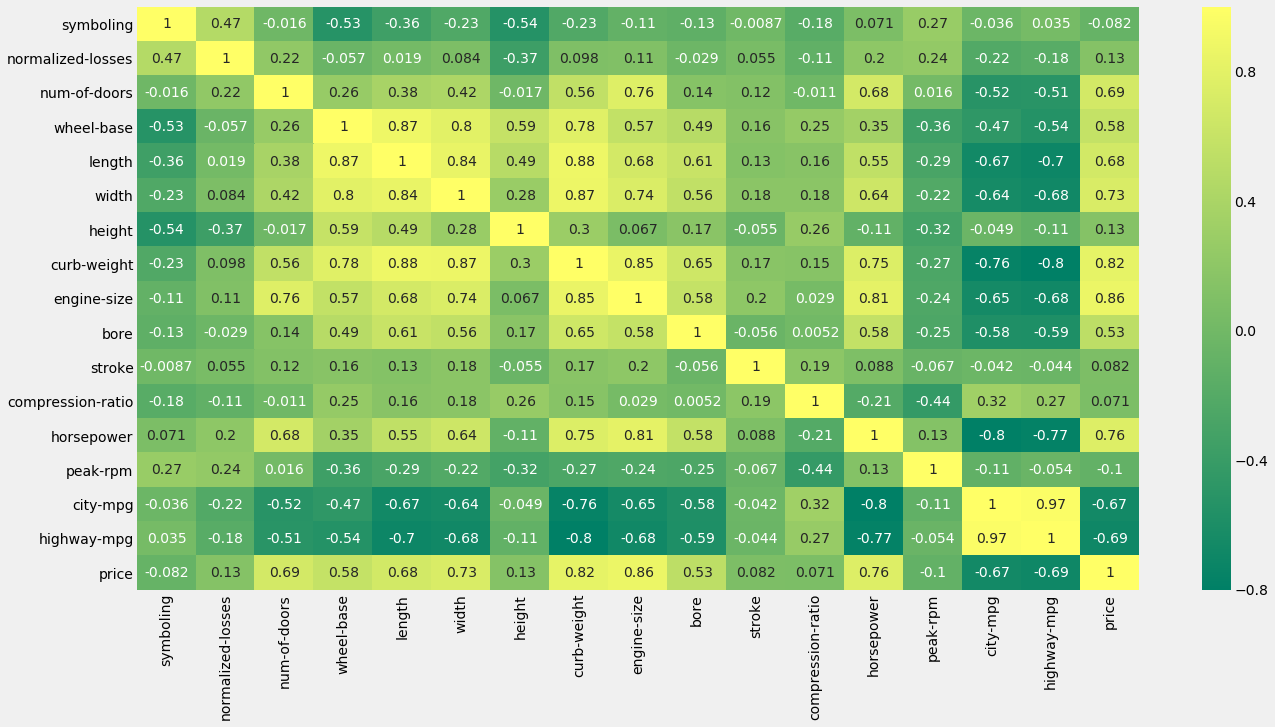

In [37]:
import seaborn as sns
plt.figure(figsize=(20,10))
sns.heatmap(car.corr(),annot=True,cmap='summer');

### From a Pair plot we can try to Vizualise the correlation of parameters

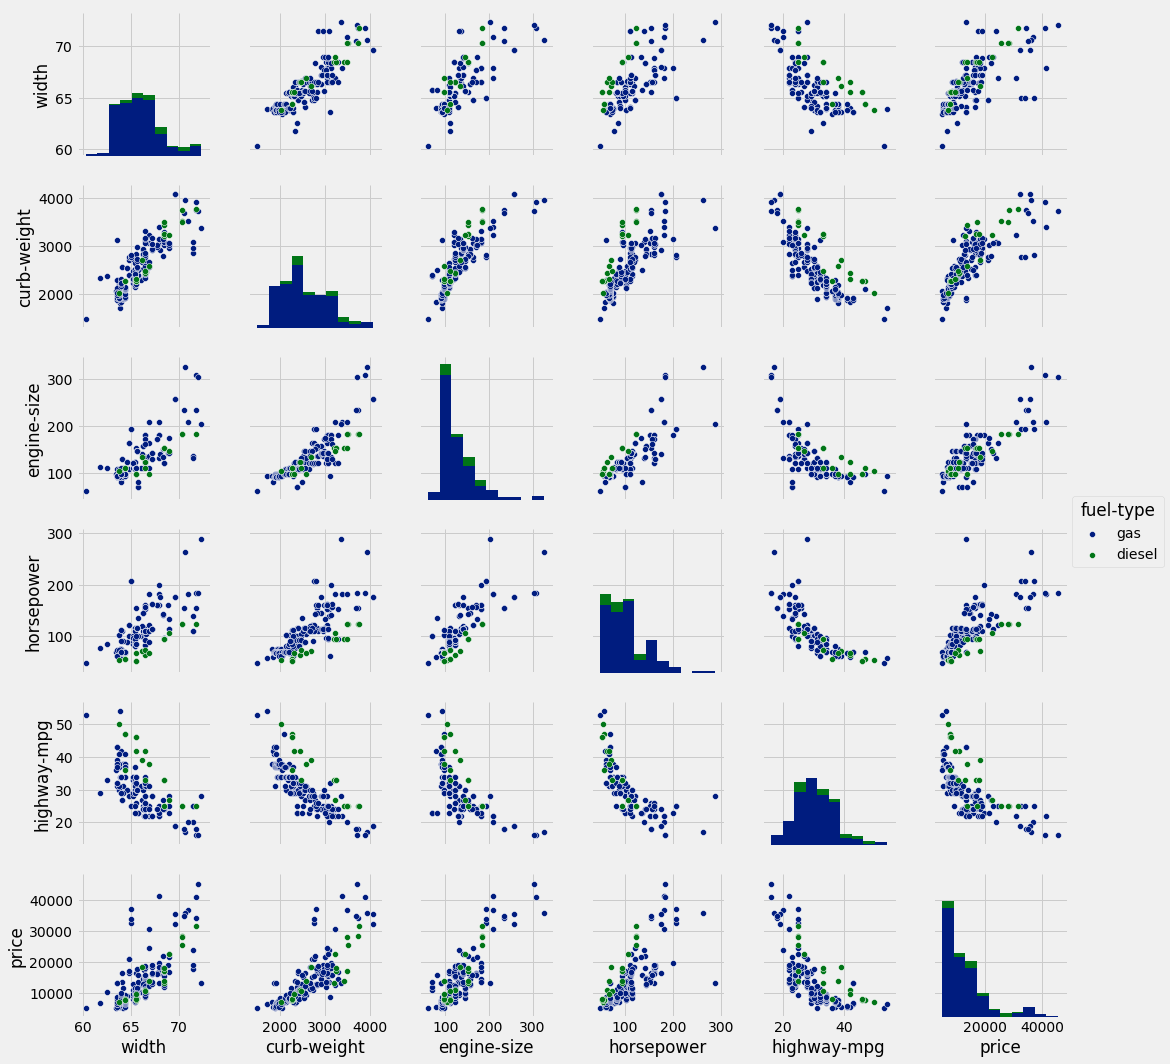

In [38]:
ax = sns.pairplot(car[["width", "curb-weight","engine-size","horsepower","highway-mpg","fuel-type","price",]], hue="fuel-type",palette='dark') #diag_kind="hist"

1.Vehicle with high price have low mileage.This because high priced vehicles go into luxary segment which are meant for high performance and running cost is not very important in this segment.

2.As the engine power(horse power) increases the price of the vehicle increases.More horse power also means bigger engine size

3.As the engine size increases the price of the vehicle increases.Weight of the engine increases with the increase in engine size.

4.High curb weight increases price of the vehicle and decreases the mileage of the vehicle.

5.Width has very good positive correlation to the price of the vehicle.



# 3.Building Machine Learning Model 

### Predicting the price of Cars

In [39]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split # for spliting the data into training and test set
from sklearn import metrics # for validating the accuracy of the model

In [40]:
train,test=train_test_split(car,test_size=0.05)
train.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,width,height,curb-weight,engine-type,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
148,0,85,subaru,gas,std,4.0,wagon,4wd,front,96.9,173.6,65.4,54.9,2420,ohcf,four,108,2bbl,3.62,2.64,9.0,82,4800.0,23,29,8013
50,1,104,mazda,gas,std,4.0,hatchback,fwd,front,93.1,159.1,64.2,54.1,1890,ohc,four,91,2bbl,3.03,3.15,9.0,68,5000.0,30,31,5195
194,-2,103,volvo,gas,std,4.0,sedan,rwd,front,104.3,188.8,67.2,56.2,2912,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400.0,23,28,12940
65,0,118,mazda,gas,std,4.0,sedan,rwd,front,104.9,175.0,66.1,54.4,2670,ohc,four,140,mpfi,3.76,3.16,8.0,120,5000.0,19,27,18280
114,0,122,peugot,diesel,turbo,4.0,wagon,rwd,front,114.2,198.9,68.4,58.7,3485,l,four,152,idi,3.70,3.52,21.0,95,4150.0,25,25,17075


In [41]:
X_train=train[['curb-weight','engine-size','horsepower','width']]
#X_train = train.drop('price',axis=1)
y_train=train.price

In [42]:
X_test=test[['curb-weight','engine-size','horsepower','width']]
y_test=test.price

In [43]:
model=LinearRegression()
model.fit(X_train,y_train)
prediction=model.predict(X_test)

In [44]:
y_test

180    15690
193    12290
198    18420
140     7603
52      6795
204    22625
81      8499
36      7295
33      6529
43      6785
53      6695
Name: price, dtype: int64

In [45]:
Line=prediction.astype(int)
Line

array([21037, 11242, 16901,  9075,  6128, 17207, 11434,  6793,  6510,
        9487,  6271])

### Logistic regression

In [46]:
model=LogisticRegression()
lm=model.fit(X_train,y_train)
prediction=model.predict(X_test)
#print('Accuracy of the Logistic Regression is:',metrics.accuracy_score(prediction,y_test))


/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/opt/conda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [47]:
logi=prediction.astype(int)
logi

array([13499,  8921, 18150,  8495,  5572,  8921,  8845, 13207,  5572,
        8921,  6229])

### Decision Tree

In [48]:
model=DecisionTreeClassifier()
model.fit(X_train,y_train)
prediction=model.predict(X_test)

In [49]:
DTree=prediction.astype(int)
DTree

array([15750, 13845, 18620,  7053,  6095, 16845,  6989,  7295,  7129,
       10295,  7395])

In this data set we have information of customer like age,country,gender,annual salary,credit card score,net worth.We will be using Artificial Neural Network and predict the Networth of an individual.Networth of an individual is an important parameter to access whether someone will buy a product or not.This can help us to do a targeted advertising too.This kernel is a work in process.If you like my work please do vote.

# 4.Conclusion 

1.In ths Dataset we have data of some car models in USA.We have imported and explored the dataset.Many columns have missing data which we have imputed using various missing value handling techniques.

2.After doing EDA we have got certain insights like 
   -We have more Japanese Cars in the Dataset followed by European
   -We can see that 90% of the cars in the Data Set are Petrol.US is a Gasoline market unlike Europe and India which have more Share of Diesel Cars
   Most vehicle have standard Aspiration.The reason is this data set is very old.Now a days most vehicles have turbo system which improves efficiency and power output from an engine.We have many other observations which are mentioned above in the notebook
   
3.We have used Decision Tree and Logistic Regression to Predict he Price of the Car 

# TO BE CONTINED 